In [318]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


In [319]:
#  y' = t³ - 2ty
# y(0) = 1
# C = 1,5 



def phi(t,y,dt): #função de discretização

    k1 = f(t, y)
    k2 = f(t+dt/2, y + dt/2*k1)
    k3 = f(t+dt/2, y + dt/2*k2)
    k4 = f(t+dt, y + dt*k3)
    
    #return 1/6*(k1 + 2*k2 + 2*k3 + k4)     #Runge-kutta
    return k1    # euler method

def f(t, y): #função de Discretização
    
    f0 = ( pow(t,3)- 2*t*y)                             ### TROCAR PARA CADA FUNCAO
    return f0

def Y(t0,T,n):
    t_n = np.linspace(t0,T,n)
    y_n = []
    for i in range(len(t_n)):
            
            y_n.append(0.5*(t_n[i]**2 - 1) + 1.5* (math.e**(-t_n[i]**2))) ###TROCAR PARA CADA FUNCAO


    return y_n,np.array(t_n)

def approx(t0,T,y0,n):
    #C.I ------------
    t_n = np.linspace(t0,T,n)
    y_n = [y0] 
    dt = (T-t0)/n
    #----------------
    for i in range(1,len(t_n)):
        y_next = y_n[-1] +  dt*phi(t_n[i],y_n[-1],dt)
        y_n.append(y_next)
    return y_n,t_n   

def generate_dataframe(t_nN,y_nN,name):
    data = pd.DataFrame({
        't_n' : t_nN,
        'y_n' : y_nN,
        'name': name
    }
    )
    return data

def generate_dfs(t0,T,y0,x):
    dfs = []
    for i in range(3,x):
        y_n,t_n = approx(t0,T,y0,2**i) 
        dfs.append(generate_dataframe(t_n,y_n,f'approx 2^{i} == {2**i}'))
    return dfs

def plot_dfs(dfs,color):
    sns.set_theme(style='whitegrid')
    for i in range(len(dfs)):
        sns.lineplot(data=dfs[i], x='t_n',y='y_n',
                     hue = 'name', color=color[i],
                     linewidth=.5*i)
    plt.xlim(3, 4)
    plt.ylim(4,6)

#440154


<Axes: xlabel='t_n', ylabel='y_n'>

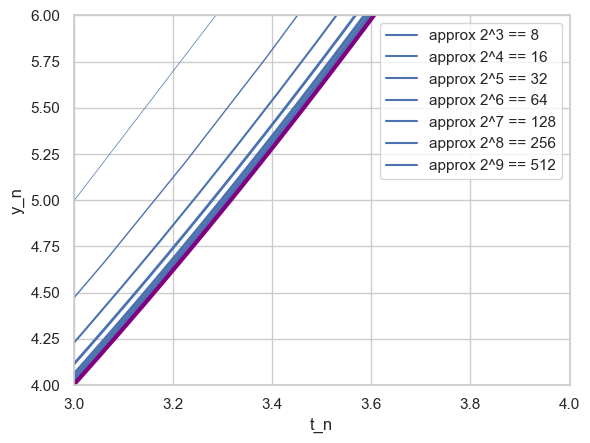

In [320]:
colors =['#440154','#482475','#414487','#355f8d','#2a788e','#21918c','#22a884','#44bf70','#7ad151','#bddf26']
print(colors[0])
dfs = generate_dfs(0,5,1,10)
plot_dfs(dfs,colors)
y_n,t_n = Y(0,5,1000)
df_exato = generate_dataframe(t_n,y_n,'exato')
sns.lineplot(data=df_exato,x='t_n',y='y_n',color='purple',linewidth=3)